In [ ]:
#USED FOR VISUALIZATION PURPOSES ONLY, NOT IN MAIN()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:

# Load the processed dataset
df = pd.read_csv("../Dataset/processed_Resaleflatprices.csv")

df = df[['town', 'flat_type', 'flat_model', 'resale_price']]


# Display first few rows
df.head()


,town,flat_type,flat_model,resale_price
0,ANG MO KIO,2 ROOM,Improved,232000.00
1,ANG MO KIO,3 ROOM,New Generation,250000.00
2,ANG MO KIO,3 ROOM,New Generation,262000.00
3,ANG MO KIO,3 ROOM,New Generation,265000.00
4,ANG MO KIO,3 ROOM,New Generation,265000.00


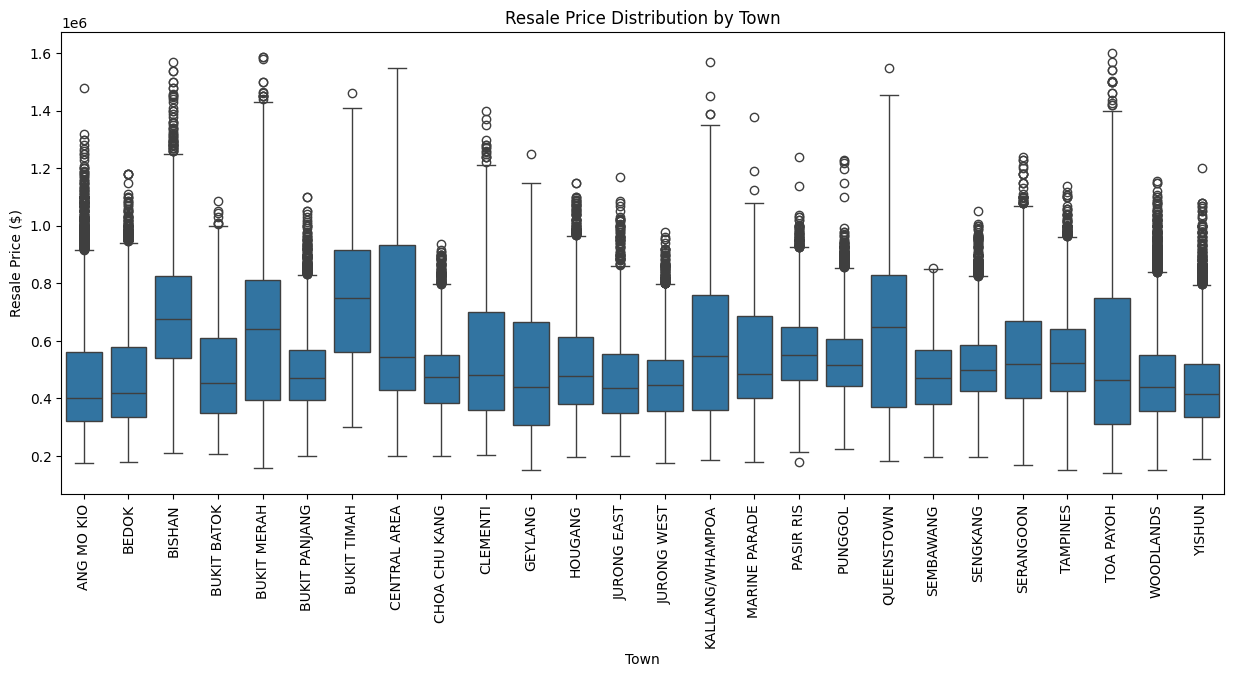

In [5]:
#boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="town", y="resale_price")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title("Resale Price Distribution by Town")
plt.xlabel("Town")
plt.ylabel("Resale Price ($)")
plt.show()

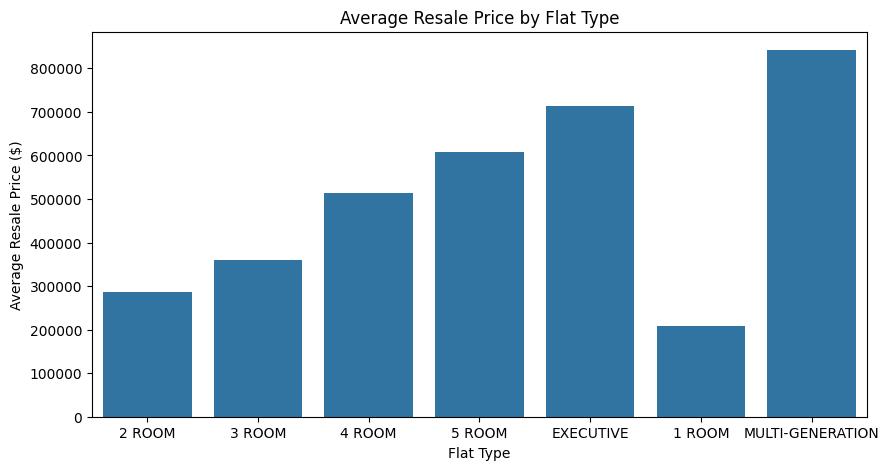

In [7]:
#barchart

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="flat_type", y="resale_price", estimator=lambda x: x.mean(), errorbar=None)
plt.title("Average Resale Price by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Average Resale Price ($)")
plt.show()


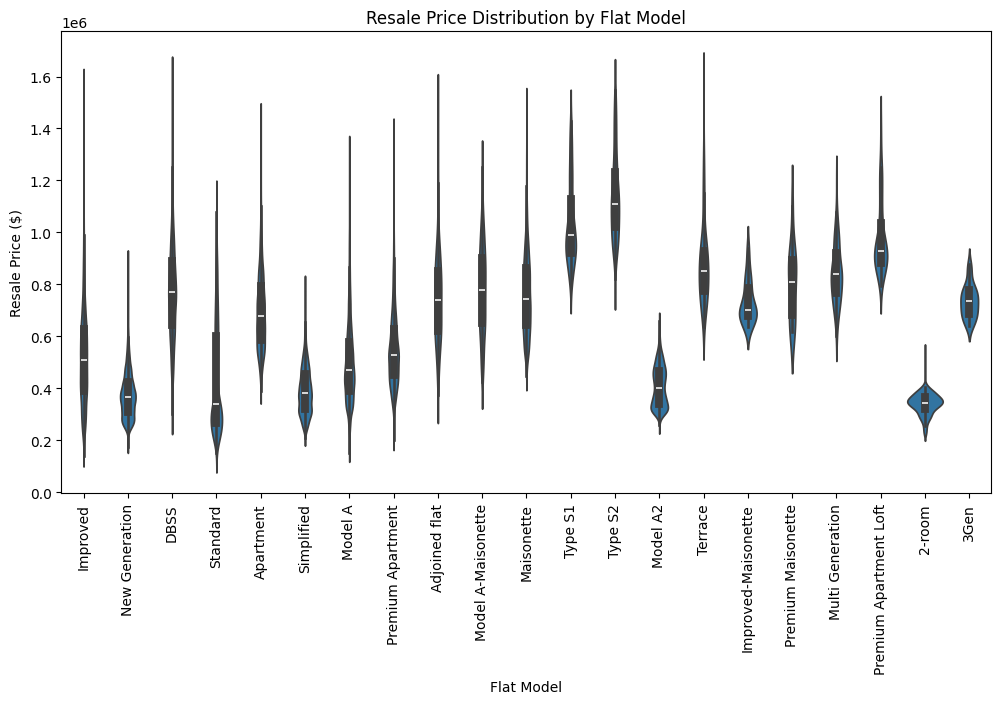

In [8]:
#price trends across flat models
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="flat_model", y="resale_price")
plt.xticks(rotation=90)  # Rotate labels
plt.title("Resale Price Distribution by Flat Model")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price ($)")
plt.show()


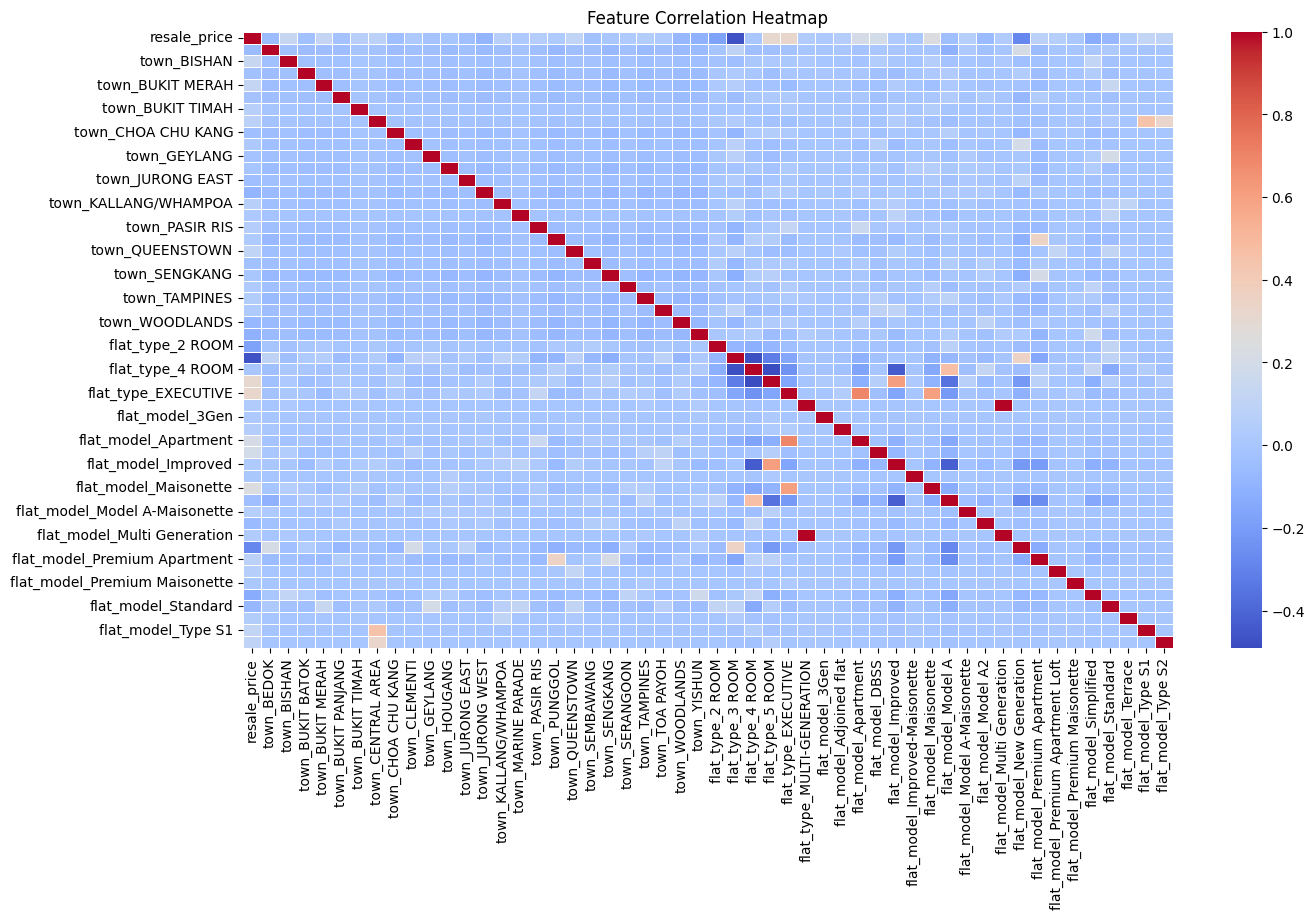

In [9]:
df_encoded = pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

# Generate correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


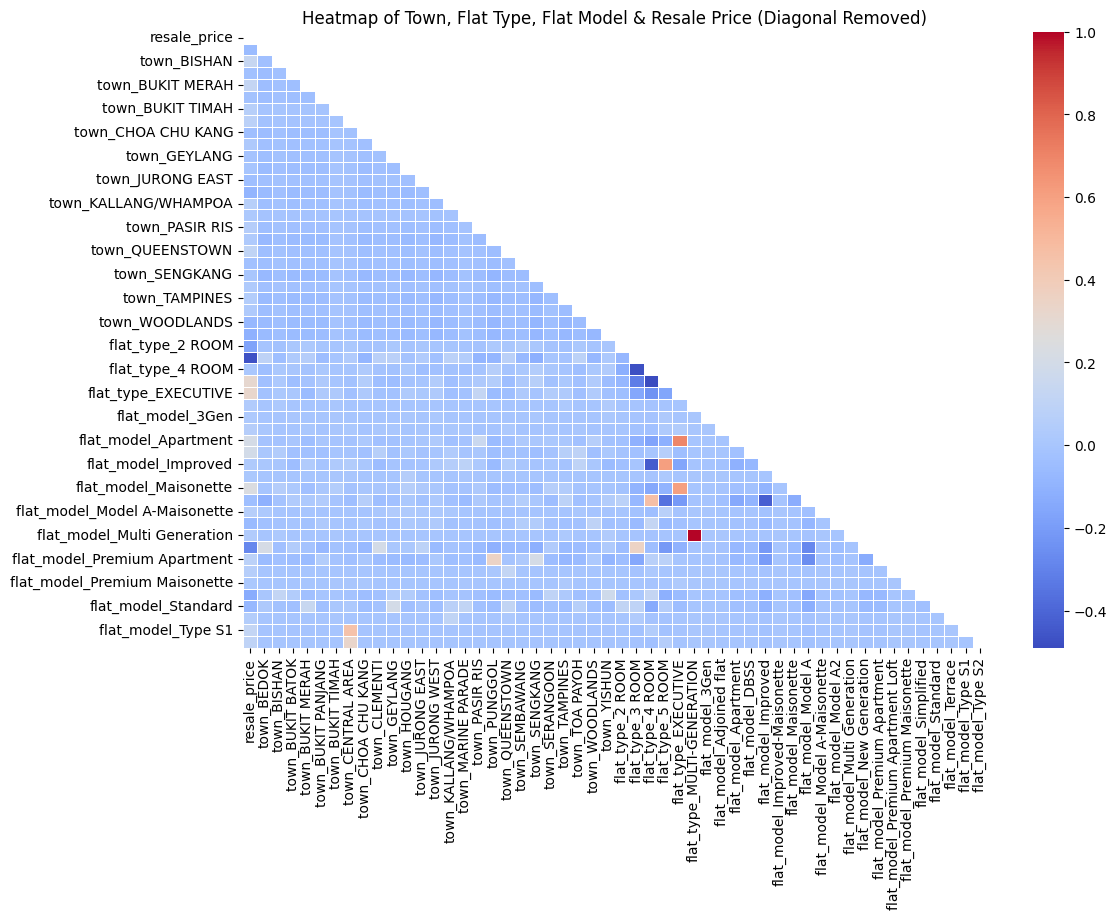

In [23]:
# One-hot encode categorical variables
import numpy as np


df_encoded = pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

# Select relevant columns
selected_cols = [col for col in df_encoded.columns if 'resale_price' in col or 'town_' in col or 'flat_type_' in col or 'flat_model_' in col]

# Compute correlation matrix
corr_matrix = df_encoded[selected_cols].corr()

# Create a mask to hide the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with masked diagonal
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Town, Flat Type, Flat Model & Resale Price (Diagonal Removed)")
plt.show()

In [13]:
# Show descriptive statistics with 2 decimal places
pd.options.display.float_format = "{:.2f}".format  # ✅ Set float format globally

# Display formatted summary statistics
display(df.describe())


,resale_price
count,200945.00
mean,510697.34
std,179027.89
min,140000.00
25%,380000.00
50%,480000.00
75%,610000.00
max,1600000.00
